In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import json
import random

In [2]:
data = json.loads(open('data/train.json').read())

In [3]:
#   replacing spaces with underlines, make into strings for count vectorizer
X_full = ([[ingredient.replace(' ', '_').encode('ascii', 'ignore') for ingredient in food['ingredients']]\
      for food in data])
#  ^Look at the badass list comprehension right there
X_full = [' '.join(ingredients) for ingredients in X_full]

y_full = map(lambda x: x['cuisine'], data)

X_full, y_full = np.asarray(X_full), np.asarray(y_full)

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,
                                                    train_size=.8,
                                                   random_state=45)
assert len(X_train) == len(y_train)

3000: 0.766561910748
3103: 0.765304839723
3206: 0.766561910748
3310: 0.76769327467
3413: 0.767441860465
3517: 0.767567567568
3620: 0.764802011314
3724: 0.768447517285
3827: 0.76819610308
3931: 0.768447517285
4034: 0.76869893149
4137: 0.768950345695
4241: 0.768950345695
4344: 0.769578881207
4448: 0.770584538026
4551: 0.771464487744
4655: 0.769830295412
4758: 0.769453174104
4862: 0.772344437461
4965: 0.769453174104
5068: 0.771590194846
5172: 0.772595851666
5275: 0.770961659334
5379: 0.771590194846
5482: 0.770458830924
5586: 0.770207416719
5689: 0.771338780641
5793: 0.770961659334
5896: 0.771464487744
6000: 0.770333123821


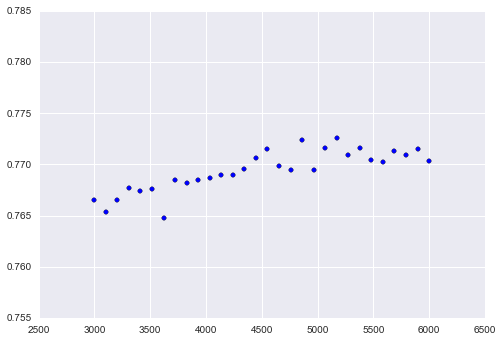

In [14]:
def predict_w_k_best():
    
    scores = []
    
    k_s = np.ndarray.tolist(np.linspace(3000, 6000, 30).astype('int'))
    
    for k in k_s:
        trans_clf = Pipeline([('count_vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('k_best', SelectKBest(k=k)),
                              ('clf', SGDClassifier())])
        trans_clf.fit(X_train, y_train)
        preds = trans_clf.predict(X_test)
        
        scores.append(np.mean(preds == y_test))
        
    for k_val, score in zip(k_s, scores):
        print '{}: {}'.format(k_val, score)
    
    plt.scatter(k_s, scores)
    
predict_w_k_best()

In [5]:
# Tests the accuracy
wrong_indexes = np.where((preds ==  y_test) != True)
wrong_indexes = np.ndarray.tolist(wrong_indexes[0])
np.mean(preds == y_test)

0.76920175989943429

In [6]:
# Prints the incorrect predictions. 
# Note how proximally close the regions are.
for index in wrong_indexes:
    print 'Correct: {}\nPredicted: {}\nIngredients: {}\n'.format(y_test[index], preds[index], X_test[index])

Correct: cajun_creole
Predicted: southern_us
Ingredients: white_rum blue_curaao peaches

Correct: irish
Predicted: southern_us
Ingredients: baking_soda egg_whites cranberries coarse_sugar low-fat_buttermilk salt pure_vanilla_extract unsalted_butter baking_powder sugar large_eggs all-purpose_flour

Correct: italian
Predicted: southern_us
Ingredients: butter cream_cheese heavy_cream

Correct: russian
Predicted: vietnamese
Ingredients: white_vinegar garlic_powder black_pepper sweet_paprika sugar salt water cucumber

Correct: french
Predicted: italian
Ingredients: baguette purple_onion fresh_lemon_juice fresh_basil large_eggs tuna_packed_in_olive_oil kosher_salt extra-virgin_olive_oil garlic_cloves ground_black_pepper Nioise_olives plum_tomatoes

Correct: korean
Predicted: chinese
Ingredients: fresh_ginger garlic oyster_sauce soy_sauce sesame_oil scallions chili_paste dark_brown_sugar fish kosher_salt crushed_red_pepper_flakes fresh_lemon_juice

Correct: french
Predicted: italian
Ingredien

In [17]:
test_data = json.loads(open('data/test.json').read())

X_out_test = ([[ingredient.replace(' ', '_').encode('ascii', 'ignore') for ingredient in food['ingredients']]\
      for food in test_data])
X_out_test = [' '.join(ingredients) for ingredients in X_out_test]
X_out_test = np.asarray(X_out_test)
len(X_out_test)

9944

In [18]:
trans_clf = Pipeline([('count_vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('k_best', SelectKBest(k=5000)),
                      ('clf', SGDClassifier())])
trans_clf.fit(X_train, y_train)
preds = trans_clf.predict(X_out_test)

In [19]:
df = pd.DataFrame(columns=['id','cuisine'])
df['id'] = map(lambda x: x['id'], test_data)

preds = trans_clf.predict(X_out_test)
df['cuisine'] = preds
df.index=df.id
df = df.drop('id', axis=1)
df.head()

,cuisine
id,
18009,irish
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian


In [20]:
df.to_csv('submissions/submission_3.csv')